# <ins>Probability and Statistics (ECSE231L) Mini Project</ins>
## ~**Made By Amaan Khan E20CSE173**

## For this mini project, I have selected my own Browser history recorded over the past year as my dataset! I have made sure to do all kinds of analysis on this data and gain important insights on my browsing pattern and habits. 

## This notebook contains all of the code and analytics that I have performed. 😉



In [31]:
import pandas as pd
import json
import tldextract
import datetime

''' 
    I imported all of my browser history from a service called "google takeout".
    This was in a json format which I loaded into a panda dataframe using the appropriate methodology.
'''
with open("BrowserHistory.json") as g:  
    data = json.loads(g.read())
    df = pd.DataFrame(data['Browser History'])
    df = df[(df['page_transition'] == "LINK") | (df['page_transition'] == "TYPED")] # This is done to remove redundancy of pages

# removing useless columns
df.drop('client_id', axis=1, inplace=True) 
df.drop('favicon_url', axis=1, inplace=True)

## This is how the data looks right now
(its very ugly 🥺)

In [32]:
df

,page_transition,title,url,time_usec
1,TYPED,PULSE 2021-22,https://discord.com/invite/smCXRnVg,1635687222723527
3,LINK,How to deactivate your Instagram account or de...,https://backlightblog-com.cdn.ampproject.org/v...,1635684284079522
4,LINK,How do I temporarily disable my Instagram acco...,https://help.instagram.com/728869160569983,1635684223975428
5,LINK,"No, Japanese government hasn't decided to disp...",https://www.altnews.in/no-japanese-government-...,1635669575693796
7,LINK,Question,https://www.quora.com/Is-a-deaf-person-allowed...,1635613429701439
...,...,...,...,...
22389,LINK,WhiteHat Junior,https://code.whitehatjr.com/trial/register?utm...,1604382663714086
22390,LINK,PUBG Mobile Ban: You Can Still Play the Game D...,https://www-mysmartprice-com.cdn.ampproject.or...,1604382416117528
22391,LINK,PUBG Interactive Map - Map Comparison,https://pubgmap.io/compare.html,1604302335681147
22392,LINK,Gamehag - Conjure up rewards by playing games!,https://gamehag.com/,1604247505869787


## Now we will prepare this data for analysis and also perform cleaning 😎

In [33]:
'''
    Here I have defined some functions to create new columns from the given columns 
    to make my life easier. 
'''

# This function has been defined to convert the time given in seconds into standard date-time format
def convert_time(x): 
    return datetime.datetime.fromtimestamp(x/1000000)
df['date_time'] = df['time_usec'].apply(convert_time)

# This function extracts the domain name from the url
def get_domain(x):
    domain = tldextract.extract(x)[1]
    sub_domain = tldextract.extract(x)[0]
    if sub_domain == "mail":
        return sub_domain + "." + domain

    
    if domain == "google" and sub_domain=="www":
        return "google_search" 
    return domain
df['domain'] = df['url'].apply(get_domain)

def get_category(x):
    if x in ["coursera", "kadenze", "fast", "kaggle", "freecodecamp", "edx"]:
        return "Learning"
    elif x in ["ycombinator", "medium", "hackernoon", "dev","manjaro","stackexchange","stackoverflow"]:
        return "Tech Reads"
    elif x in ["youtube"]:
        return "YouTube"
    elif x in ["bennett"]:
        return "LMS"
    elif x in ["chess", "lichess"]:
        return "chess.com"
    elif x in ["flipkart", "amazon", "thesouledstore", "redwolf", "geekdawn", "comicsense","coveritup","myntra"]:
        return "Shopping"
    elif x in ["google", "google_search"]:
        return "Google Search"
    elif x in ["kickassanime", "gogoanimes", "netflix", "primevideo", "gogoanime"]:
        return "Video Streaming"
    elif x in ["newtab"]:
        return "New Tab"
    elif x in ["github", "codezinger", "geeksforgeeks", "codechef", "tryhackme", "hackerone","leetcode","hackerrank"]:
        return "Programming"
    elif x in ["instagram", "facebook", "whatsapp", "reddit", "discord", "twitter","linkedin"]:
        return "Social Media"
    elif x in ["wikipedia"]:
        return "Wikipedia"
    elif x in ["spotify"]:
        return "Spotify"
    else:
        return "Other"
df['category'] = df['domain'].apply(get_category)

def is_secure(x):
    check = x[0:5]
    if check=="https":
        return True
    return False
df ['is_secure'] = df['url'].apply(is_secure)

def get_month(x):
    return x.month
df['month'] = df['date_time'].apply(get_month)

def get_date(x):
    return x.date()
df['date'] = df['date_time'].apply(get_date)

def get_hour(x):
    return x.hour 
df['hour'] = df['date_time'].apply(get_hour)

def day_of_week(x):
    return x.strftime('%A')
df['day'] = df['date'].apply(day_of_week)


def is_weekend(x):
    weekend = ["Saturday", "Sunday"]
    if x in weekend:
        return True
    return False 
df['is_weekend'] = df['day'].apply(is_weekend)


# since we have converted our time, we dont need the 'time_usec' column as well
df.drop('time_usec', axis=1, inplace=True)
# 'date_time' column is not needed as well as it has been broken down into hour, month, day, date
df.drop('date_time', axis=1, inplace=True)
# we also want to remove rows in the dataframe where domain = newtab as they are not important for our analysis
df = df[df['domain'] != "newtab"]


In [34]:
# from collections import Counter
# count_dict = Counter(df['domain'])
# marklist = sorted(count_dict.items(), key=lambda x:x[1], reverse=True)
# count_dict = dict(marklist)
# uncomment the above code to get list of most visited domains

## Now, the data looks like this:

In [35]:
print(df.shape)
df

(12988, 11)


,page_transition,title,url,domain,category,is_secure,month,date,hour,day,is_weekend
1,TYPED,PULSE 2021-22,https://discord.com/invite/smCXRnVg,discord,Social Media,True,10,2021-10-31,19,Sunday,True
3,LINK,How to deactivate your Instagram account or de...,https://backlightblog-com.cdn.ampproject.org/v...,ampproject,Other,True,10,2021-10-31,18,Sunday,True
4,LINK,How do I temporarily disable my Instagram acco...,https://help.instagram.com/728869160569983,instagram,Social Media,True,10,2021-10-31,18,Sunday,True
5,LINK,"No, Japanese government hasn't decided to disp...",https://www.altnews.in/no-japanese-government-...,altnews,Other,True,10,2021-10-31,14,Sunday,True
7,LINK,Question,https://www.quora.com/Is-a-deaf-person-allowed...,quora,Other,True,10,2021-10-30,22,Saturday,True
...,...,...,...,...,...,...,...,...,...,...,...
22389,LINK,WhiteHat Junior,https://code.whitehatjr.com/trial/register?utm...,whitehatjr,Other,True,11,2020-11-03,11,Tuesday,False
22390,LINK,PUBG Mobile Ban: You Can Still Play the Game D...,https://www-mysmartprice-com.cdn.ampproject.or...,ampproject,Other,True,11,2020-11-03,11,Tuesday,False
22391,LINK,PUBG Interactive Map - Map Comparison,https://pubgmap.io/compare.html,pubgmap,Other,True,11,2020-11-02,13,Monday,False
22392,LINK,Gamehag - Conjure up rewards by playing games!,https://gamehag.com/,gamehag,Other,True,11,2020-11-01,21,Sunday,True


## Finally, we are free to perform exploratory analysis on this data 🥳

In [36]:
'''
    First, I would like to find out the oldest date and newest date present in the data which will help us in figuring out the time period of this data.
'''
# finding oldest date
oldest = min(df['date'])
print("The oldest date in this data is", oldest)

import pytz
now = datetime.date.today()
youngest = max(dt for dt in df['date'] if dt < now)
print("The newest date in this data is", youngest)

The oldest date in this data is 2020-11-01
The newest date in this data is 2021-10-31


## So, as we can see above, the data covers a period of about 1 year from 1st November 2020 to 31st October 2021

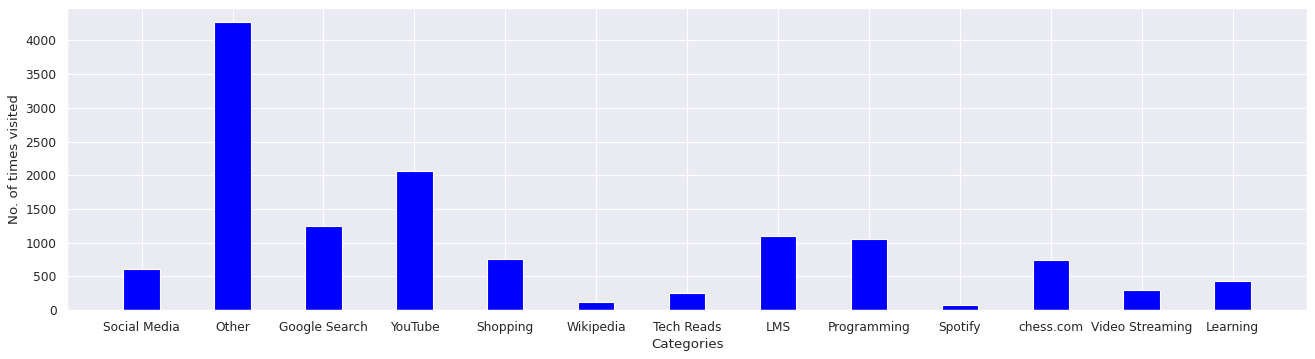

{'Social Media': 601, 'Other': 4268, 'Google Search': 1241, 'YouTube': 2065, 'Shopping': 755, 'Wikipedia': 120, 'Tech Reads': 251, 'LMS': 1096, 'Programming': 1055, 'Spotify': 67, 'chess.com': 744, 'Video Streaming': 291, 'Learning': 434}


In [37]:
'''
    Now, I want to analyse which category of websites I visit the most. 
'''
import matplotlib.pyplot as plt
from collections import Counter
count_dict = Counter(df['category'])
count_dict = dict(count_dict)


categories = list(count_dict.keys())
values = list(count_dict.values())

# code to make the plot bigger
from matplotlib.pyplot import figure
figure(figsize=(20, 5), dpi=80)

plt.bar(categories, values, color ='blue', width=0.4)
plt.xlabel("Categories")
plt.ylabel("No. of times visited")
plt.show()
print(count_dict)



## As we can see in the above plot, I have visited Youtube about 2000 times in the past year, which is about 5.5 times each day! 
## I also visited the LMS about 2.25 times every day and played an average of 2 chess matches
## Whereas, I visited programming or learning wesbites only about 4.76 times 🥲

<AxesSubplot:xlabel='hour', ylabel='count'>

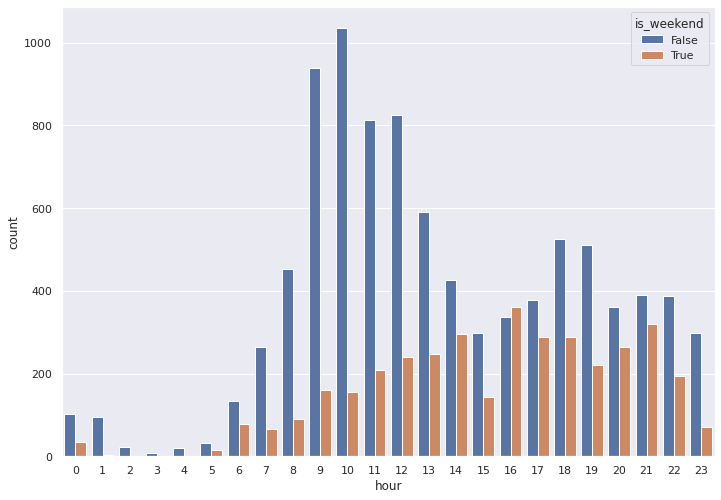

In [38]:
''' 
    Let's see my browsing trends on weekdays vs weekends
'''
import seaborn as sns
# below line is the adjust figure size 
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.countplot(x="hour", hue="is_weekend", data=df)

## from the above plot, we can see a lot of interesting things. For example, we can see that at around 4 pm, my weekend activity exceeds my non-weekend activity even though there are 2.5x more non-weekend days(5) than weekend days(2). Another interesting thing is that we can clearly that there is almost no activity from 12 am to 5 am each day (which is when I sleep). Maximum activity is around 10 am on non-weekends which is understandable 😬.

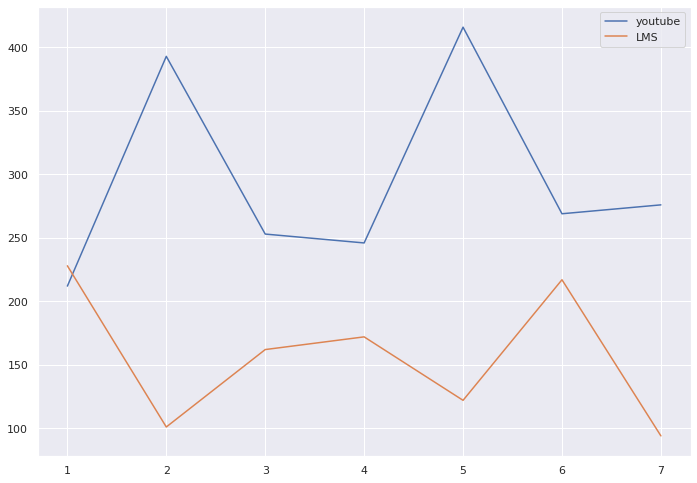

In [39]:
'''
    I also want to compare my youtube.com and LMS visits on each day of the week
'''
# disable IDIOT warning
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# this function we find the day number of the days. For example, monday = 1, Tuesday = 2 etc.
days_arr = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def day_num(x):
    return days_arr.index(x) + 1
df['day_num'] = df['day'].apply(day_num)




x1 = [1,2,3,4,5,6,7]
y1 = [0,0,0,0,0,0,0]
df_new = df[df['domain']=='youtube']
for i in df_new['day_num']:
    y1[i-1] += 1
y2 = [0,0,0,0,0,0,0]
df_new = df[df['domain']=='bennett']
for i in df_new['day_num']:
    y2[i-1] += 1

plt.plot(x1,y1, label="youtube")
plt.plot(x1,y2, label="LMS")
plt.legend()
plt.show()

## in the above plot, we can make the observation that on the days that youtube activity is at its peak (like tuesday and friday), LMS activity is at its lowest value and vice versa (like saturday, wednesday, thursday). Also, on mondays, LMS activity is more than youtube!

<AxesSubplot:xlabel='month', ylabel='count'>

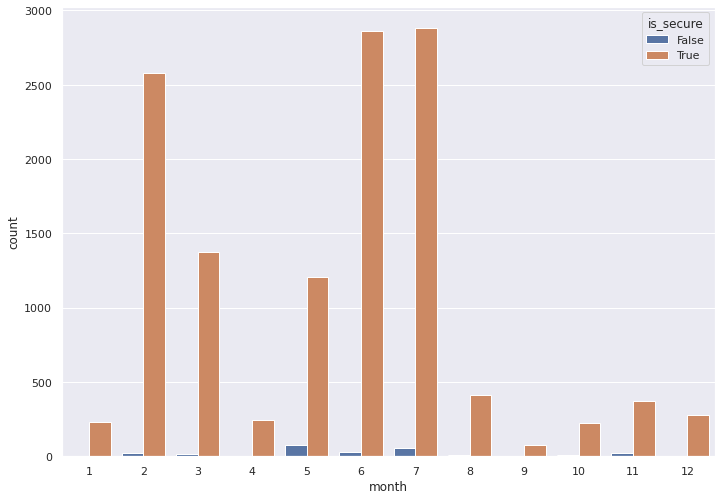

In [40]:
'''
    now lets check how many websites I visited were secure. If a website uses https, I have marked it as secure and if not, it is marked as not secure in the 'is_secure' column I made earlier
'''
# below line is the adjust figure size 
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.countplot(x="month", hue="is_secure", data=df)


## not suprisingly, we can see that most of the websites that I visited were secure....except some in may :)

<AxesSubplot:xlabel='day', ylabel='hour'>

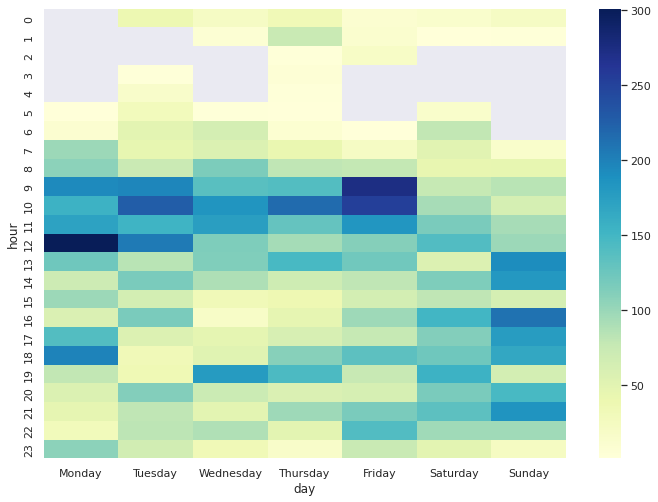

In [41]:
'''
    lets explore my activity during hour of day using a heatmap
'''

df_heat = df.groupby(["hour", "day"])["domain"].size().reset_index()
df_heat2 = df_heat.pivot("hour", "day", "domain")
sns.heatmap(df_heat2[days_arr] , cmap="YlGnBu")


## In the above heatmap, we can again see that there is not much activity in the 12am - 5am period during which I sleep 😴

# Now lets ask some questions and try to answer them by using this DATA (this is the fun part)

## Q1) When do I study the most? (weekends or non-weekends) 

OrderedDict([(1, 228), (2, 101), (3, 162), (4, 172), (5, 122), (6, 217), (7, 94)])


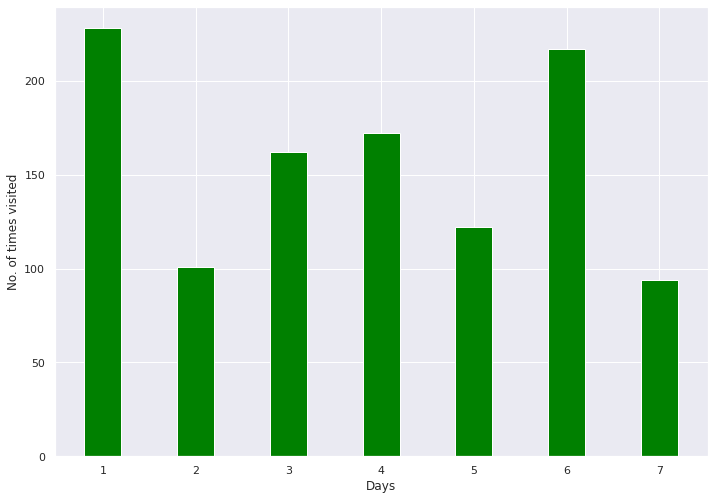

In [42]:
'''
    To try and answer this question, I would like to make the following assumption:
    During each study session, I open the LMS atleast once.
    So, we can track the usage of LMS on each day of the week to get our answer
'''

df_new = df[df['domain']=='bennett']
count_dict = Counter(df_new['day_num'])
count_dict = dict(count_dict)

# Creates a sorted dictionary (sorted by key)
from collections import OrderedDict
dict1 = OrderedDict(sorted(count_dict.items()))
print(dict1)

categories = list(count_dict.keys())
values = list(count_dict.values())

plt.bar(categories, values, color ='green', width=0.4)
plt.xlabel("Days")
plt.ylabel("No. of times visited")
plt.show()

## So, as we can see from above graph that I like to distribute my work throughout the week but I do the most work on Saturdays and Mondays (which I know is true) and chill on sundays like chads do 😎

## Q2) Which hour of the day do I shop most?

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[2, 0, 0, 0, 1, 0, 1, 17, 35, 32, 81, 30, 88, 15, 58, 28, 86, 45, 68, 55, 36, 55, 17, 5]


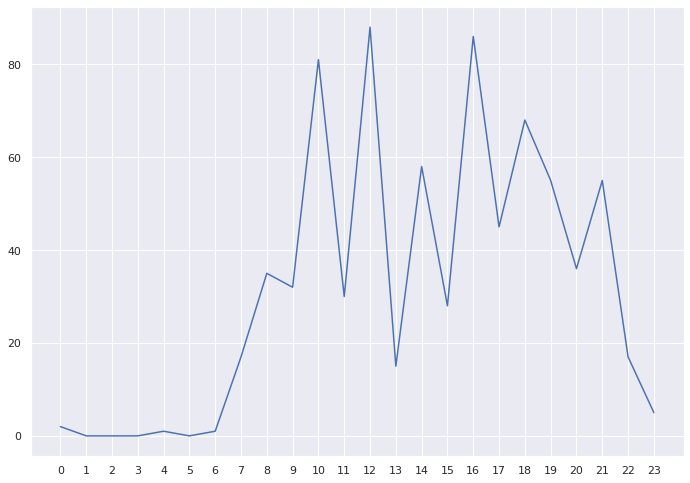

In [43]:
'''
    To answer this question, we can plot out my visits on shopping websites during different times
'''

x = set()
for i in df['hour']:
    x.add(i)
x = list(x)
y = []
for i in range(24): 
    y.append(0)
df_new = df[df['category']=='Shopping']
for i in df_new['hour']:
    y[i] += 1

print(x)
print(y)
plt.plot(x,y)
plt.xticks(x)
plt.show()

## We observe that I shop mostly at 12 pm followed closely by 4 pm in the afternoon and 10 am and I tend to shop least at around 1 pm (non-sleeping hours)

## Q3) What is the average number of pages I visit each day? What is minimum and what is maximum?

In [44]:
'''
    To answer this question, I will make a list of website visits each day and find the average of that list
'''

count_dict = Counter(df['date'])
values = count_dict.values()
values = list(values)

import numpy as np
from scipy import stats

mean = np.mean(values)
median = np.median(values)
mode = stats.mode(values)


print("The mean number of pages you visited each day is :", mean)
print("However, the median of this data is", median)
print("and the mode is", mode[0], "which occured", mode[1], "times")

values.sort()
print("\nThe min visits are", values[0])
print("and the max visits are", values[len(values)-1])

The mean number of pages you visited each day is : 39.12048192771084
However, the median of this data is 9.5
and the mode is [1] which occured [28] times

The min visits are 1
and the max visits are 420


## We can see that I visit around 40 pages each day and there have been around 28 days where I visited only 1 website (hopefully holidays).

## Q4) What do I prefer: learning through college professors or learning on my own?

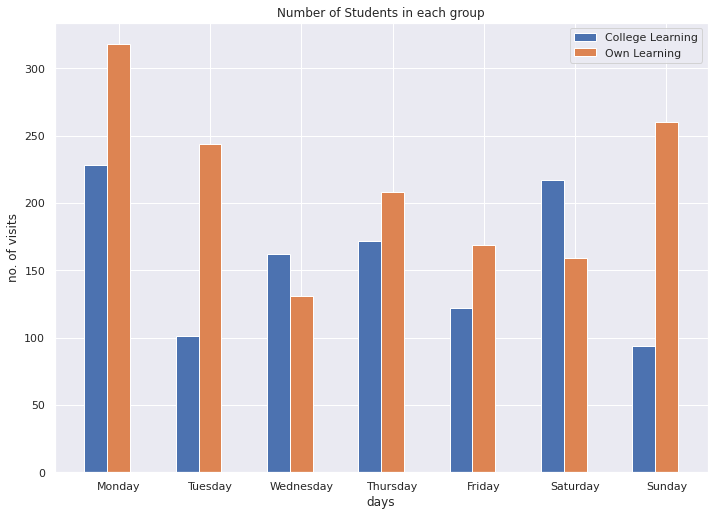

In [45]:
'''
    To answer this question, I will make the following assumptions:
    1) If I learn through college professors, I open the LMS atleast once.
    2) If I learn on my own, I open websites mentioned in the programming and learning categories
''' 

x = days_arr
width = 0.25
ind = np.arange(7) 
# first we will make array of number of times LMS has been visited in each day
y1 = [0,0,0,0,0,0,0]
df_new = df[df['domain']=='bennett']
for i in df_new['day_num']:
    y1[i-1] += 1
# now we will make array of number of times programming and learning websites have been visited
y2 = [0,0,0,0,0,0,0]
df_new = df[(df['category'] == "Programming") | (df['category'] == "Learning")]
for i in df_new['day_num']:
    y2[i-1] += 1

plt.bar(ind, y1, 0.25, label = 'College Learning')
plt.bar(ind+width, y2, 0.25, label = 'Own Learning')
  
plt.xticks(ind+width,days_arr)
plt.xlabel("days")
plt.ylabel("no. of visits")
plt.title("Number of Students in each group")
plt.legend()
plt.show()

## as we can clearly see, I prefer learning on my own. On saturdays and wednesdays, I tend to open the LMS more whereas, I learn on my own on the other days. This observation fits perfectly with my usual routine where I try to revise college work done during the week on saturdays and do my own learning on sundays and mondays. 

# **CONCLUSION**

## After so much of analysis, we finally come to the conclusion of our project. To sum up, I took a data set representing my browser history over the past year and tried to extract meaningful insights from it. Since we were able to perform a thorough analysis and also answer so many question, I would call this project a success. 

## I learnt a lot while doing this project. I gained some interesting insights into my life. 
> ## I realised that I generally shop and visit youtube during class hours 🤭. 
> ## I also saw that my top 10 visited websites make up most of my internet activity. 
> ## We also saw that my youtube activity goes up whenever my LMS activity comes down and vice versa indicating that these two are co-related.  


# **Future Plans**

## Apart from offering brower history data, "google takeout" provides all kinds of data that has been collected from your google acoount like google photos data, drive data, and most importantly, google maps data. So, the future plan is to improve upon this project by taking into account data from other services like google maps. This would allow us to answer questions like "what websites I visit while I am travelling?" or "what is the average number of photos I take per outing?"

# **THE END 🥰** 